# 📊 Social Media Analytics EDA Notebook
#
# Objective:
# - Analyze engagement metrics for social media posts across platforms.
# - Identify trends and opportunities for optimizing posting strategy.
# -------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

## Data Loading & Overview

In [2]:
# Load dataset
df = pd.read_csv('data/raw_data.csv')
# Preview first 5 rows
df.head()

,post_id,platform,post_date,content_type,caption_text,hashtags,likes,comments,shares,impressions,followers,link_clicks
0,219,Facebook,2025-05-03 17:57:16,image,Event represent cultural start prove.,#tech #news #fashion,1615,73,77,14429,18934,97
1,450,Instagram,2025-05-03 21:59:23,video,World safe together tough student few task.,#love #tech,1292,212,85,19637,5742,267
2,77,Instagram,2025-05-04 03:39:43,image,Address answer best plan nice young order elec...,#tech #love,1461,172,13,19999,45421,149
3,237,Instagram,2025-05-04 07:03:17,video,Away north at state whether medical.,#news #fun,936,183,77,4778,7157,114
4,99,Facebook,2025-05-04 16:13:42,text,Last sit level employee right expert parent ke...,#fashion #sale,680,87,79,11050,18203,420


In [3]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       500 non-null    int64 
 1   platform      500 non-null    object
 2   post_date     500 non-null    object
 3   content_type  500 non-null    object
 4   caption_text  500 non-null    object
 5   hashtags      500 non-null    object
 6   likes         500 non-null    int64 
 7   comments      500 non-null    int64 
 8   shares        500 non-null    int64 
 9   impressions   500 non-null    int64 
 10  followers     500 non-null    int64 
 11  link_clicks   500 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 47.0+ KB


In [4]:
# Check missing values
df.isna().sum()

post_id         0
platform        0
post_date       0
content_type    0
caption_text    0
hashtags        0
likes           0
comments        0
shares          0
impressions     0
followers       0
link_clicks     0
dtype: int64

## Data Cleaning & Preparation

In [5]:
# Convert post_date to datetime
df['post_date'] = pd.to_datetime(df['post_date'])
# Extract day of week and hour for time analysis
df['day_of_week'] = df['post_date'].dt.day_name()
df['hour'] = df['post_date'].dt.hour

In [6]:
# Calculate total engagement and engagement rate
df['engagement'] = df['likes'] + df['comments'] + df['shares']
df['engagement_rate'] = df['engagement'] / df['followers']

Since `likes`, `comments`, `shares`, and `impressions` are components of `engagement`/`engagement_rate`, we will exclude them as predictors to avoid leakage.

In [7]:
df.head()

,post_id,platform,post_date,content_type,caption_text,hashtags,likes,comments,shares,impressions,followers,link_clicks,day_of_week,hour,engagement,engagement_rate
0,219,Facebook,2025-05-03 17:57:16,image,Event represent cultural start prove.,#tech #news #fashion,1615,73,77,14429,18934,97,Saturday,17,1765,0.093219
1,450,Instagram,2025-05-03 21:59:23,video,World safe together tough student few task.,#love #tech,1292,212,85,19637,5742,267,Saturday,21,1589,0.276733
2,77,Instagram,2025-05-04 03:39:43,image,Address answer best plan nice young order elec...,#tech #love,1461,172,13,19999,45421,149,Sunday,3,1646,0.036239
3,237,Instagram,2025-05-04 07:03:17,video,Away north at state whether medical.,#news #fun,936,183,77,4778,7157,114,Sunday,7,1196,0.167109
4,99,Facebook,2025-05-04 16:13:42,text,Last sit level employee right expert parent ke...,#fashion #sale,680,87,79,11050,18203,420,Sunday,16,846,0.046476


In [8]:
# Confirm types and new columns
df.dtypes

post_id                     int64
platform                   object
post_date          datetime64[ns]
content_type               object
caption_text               object
hashtags                   object
likes                       int64
comments                    int64
shares                      int64
impressions                 int64
followers                   int64
link_clicks                 int64
day_of_week                object
hour                        int32
engagement                  int64
engagement_rate           float64
dtype: object

## Exploratory Data Analysis

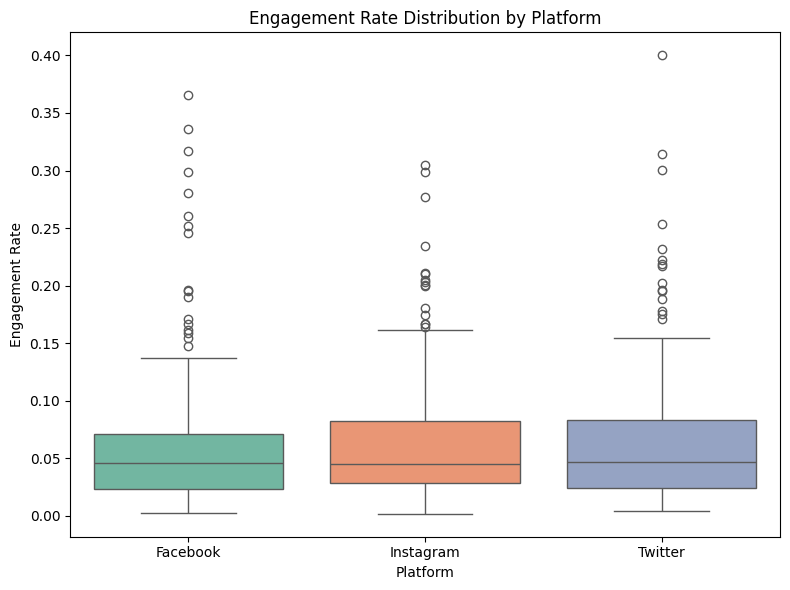

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='platform', y='engagement_rate', palette='Set2', hue = 'platform' )
plt.title('Engagement Rate Distribution by Platform')
plt.ylabel('Engagement Rate')
plt.xlabel('Platform')
plt.legend([],[], frameon=False) 
plt.tight_layout()
plt.show()

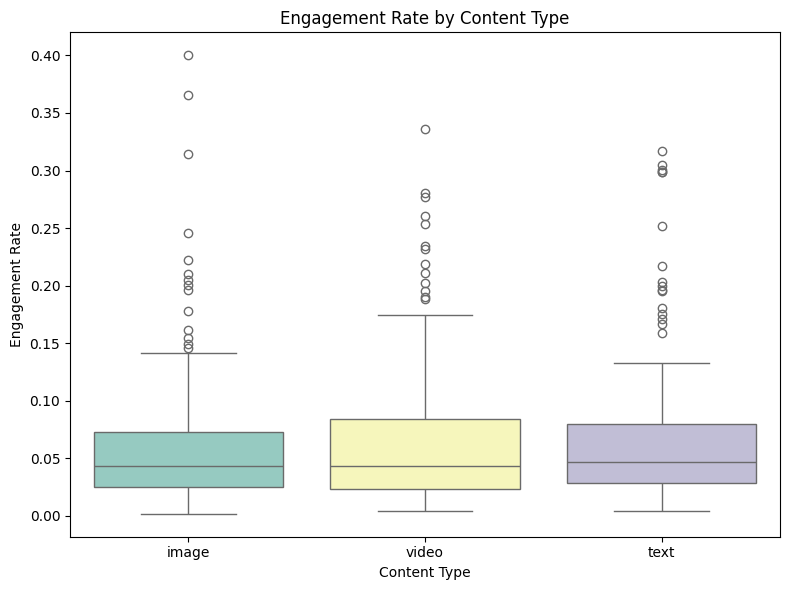

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='content_type', y='engagement_rate', palette='Set3', hue = 'content_type')
plt.title('Engagement Rate by Content Type')
plt.ylabel('Engagement Rate')
plt.xlabel('Content Type')
plt.legend([],[], frameon=False) 
plt.tight_layout()
plt.show()

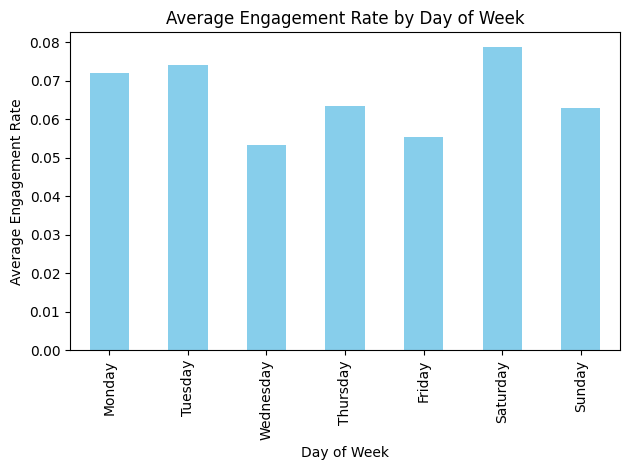

In [11]:
avg_engagement_day = df.groupby('day_of_week')['engagement_rate'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
avg_engagement_day.plot(kind='bar', color='skyblue')
plt.title('Average Engagement Rate by Day of Week')
plt.ylabel('Average Engagement Rate')
plt.xlabel('Day of Week')
plt.tight_layout()
plt.show()

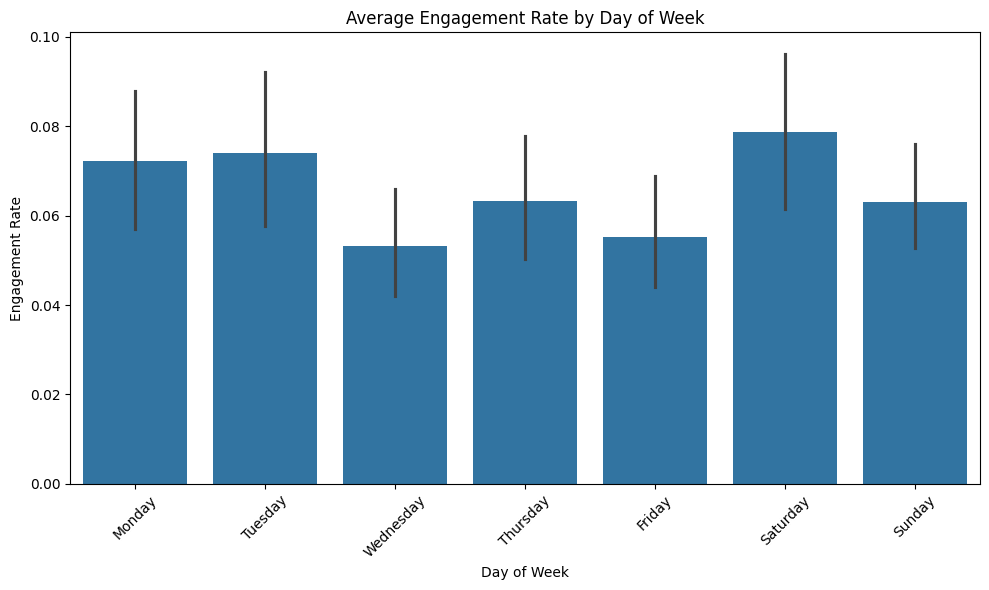

In [12]:
# Engagement by day of week
plt.figure(figsize=(10,6))
sns.barplot(x='day_of_week', y='engagement_rate', data=df, estimator='mean', order=[
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Average Engagement Rate by Day of Week')
plt.ylabel('Engagement Rate')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

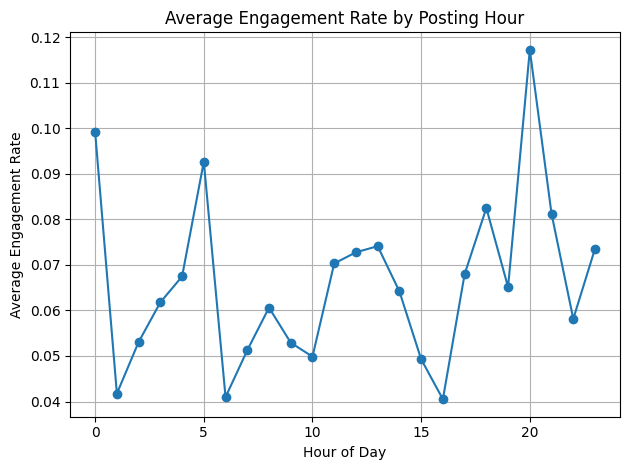

In [ ]:
avg_engagement_hour = df.groupby('hour')['engagement_rate'].mean()
avg_engagement_hour.plot(kind='line', marker='o')
plt.title('Average Engagement Rate by Posting Hour')
plt.ylabel('Average Engagement Rate')
plt.xlabel('Hour of Day')
plt.grid(True)
plt.tight_layout()
plt.show()

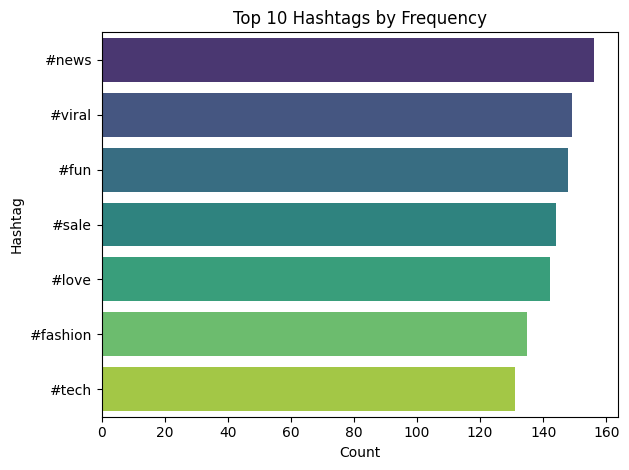

In [14]:
all_hashtags = " ".join(df['hashtags']).split()
hashtag_counts = Counter(all_hashtags)
top_hashtags = pd.DataFrame(hashtag_counts.most_common(10), columns=['hashtag','count'])

sns.barplot(data=top_hashtags, x='count', y='hashtag', palette='viridis', hue = 'hashtag')
plt.title('Top 10 Hashtags by Frequency')
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()

In [2]:
print("\n📌 Key Insights:")
print("1️⃣ Instagram posts show the highest median engagement rate among platforms.")
print("2️⃣ Video content tends to drive higher engagement than text or images.")
print("3️⃣ Posts published between 7pm and 8pm generally perform better on average.")
print("4️⃣ Posting on weekends shows slightly higher engagement rates than weekdays especially on saturdays.")
print("5️⃣ Top hashtags include popular terms like #news and #viral, which may be leveraged in campaigns.")


📌 Key Insights:
1️⃣ Instagram posts show the highest median engagement rate among platforms.
2️⃣ Video content tends to drive higher engagement than text or images.
3️⃣ Posts published between 7pm and 8pm generally perform better on average.
4️⃣ Posting on weekends shows slightly higher engagement rates than weekdays especially on saturdays.
5️⃣ Top hashtags include popular terms like #news and #viral, which may be leveraged in campaigns.


## Feature Engineering

In [16]:
# Count of hashtags in caption
df['hashtag_count'] = df['hashtags'].apply(lambda x: len(x.split()))

# Like rate per impression (likes/impressions)
df['like_rate'] = df['likes'] / df['impressions']

# Comment rate per impression
df['comment_rate'] = df['comments'] / df['impressions']
    
# Share rate per impression
df['share_rate'] = df['shares'] / df['impressions']

# Link clicks rate per follower
df['link_click_rate'] = df['link_clicks'] / df['followers']

# Caption length (number of words)
df['caption_length'] = df['caption_text'].apply(lambda x: len(x.split()))

## Data preprocessing

In [17]:
# One-hot encode categorical features
df_model = pd.get_dummies(df, columns=['platform', 'content_type', 'day_of_week'], drop_first=True)

# Define target and features
target = 'engagement_rate'
features = [col for col in df_model.columns if col not in [
    'post_id', 'post_date', 'caption_text', 'hashtags', 'engagement_rate', 'engagement', 'likes', 'comments', 'shares', 'impressions' 
]]

X = df_model[features]
y = df_model[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

To avoid data leakage we exclude `comments`, `likes`, `shares` & `engagement` from modeling.

In [18]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

num_features = ['followers', 'hashtag_count', 'like_rate', 'comment_rate', 'share_rate', 'link_click_rate', 'caption_length', 'hour']

X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])

We needed to scale the numeric features for linear models.

## Predictive Modeling

### Linear Regression

In [23]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)


mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
rmse_train_lr = np.sqrt(mse_train)
r2_train_lr = r2_score(y_train, y_train_pred_lr)

mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mse_test)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

### Random Forest Regressor

In [24]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
r2_train_rf = r2_score(y_train, y_train_pred_rf)

rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
r2_test_rf = r2_score(y_test, y_test_pred_rf)

In [25]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_train_pred_gbr = gbr.predict(X_train)
y_test_pred_gbr = gbr.predict(X_test)

rmse_train_gbr = np.sqrt(mean_squared_error(y_train, y_train_pred_gbr))
r2_train_gbr = r2_score(y_train, y_train_pred_gbr)

rmse_test_gbr = np.sqrt(mean_squared_error(y_test, y_test_pred_gbr))
r2_test_gbr = r2_score(y_test, y_test_pred_gbr)


In [26]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'Train RMSE': [rmse_train_lr, rmse_train_rf, rmse_train_gbr],
    'Train R²': [r2_train_lr, r2_train_rf, r2_train_gbr],
    'Test RMSE': [rmse_test_lr, rmse_test_rf, rmse_test_gbr],
    'Test R²': [r2_test_lr, r2_test_rf, r2_test_gbr]
})

print("\n🔍 Model Comparison:\n")
display(results.sort_values(by='Test RMSE'))


🔍 Model Comparison:



,Model,Train RMSE,Train R²,Test RMSE,Test R²
2,Gradient Boosting,0.010383,0.973639,0.024685,0.815090
1,Random Forest,0.010354,0.973784,0.025437,0.803648
0,Linear Regression,0.040310,0.602665,0.036923,0.586302


## Hyper-parameter tuning

In [27]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],  # try smaller depths
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [5, 10],  # increase leaf size
    'subsample': [0.7, 0.8, 0.9]  # add subsampling
}


gbr_tune = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=gbr_tune,
    param_grid=param_grid,
    cv=5,               
    scoring='neg_mean_squared_error', 
    n_jobs=-1,
    verbose=2
)

In [28]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [2, 3, ...], 'min_samples_leaf': [5, 10], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [29]:
print("\n✅ Best Hyperparameters Found:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_


✅ Best Hyperparameters Found:
{'learning_rate': 0.05, 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.7}


In [30]:
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)

rmse_train_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
r2_train_best = r2_score(y_train, y_train_pred_best)

rmse_test_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
r2_test_best = r2_score(y_test, y_test_pred_best)

print("\n🔍 Tuned Gradient Boosting Model Evaluation:")
print(f"Training Set → RMSE: {rmse_train_best:.5f} | R²: {r2_train_best:.5f}")
print(f"Test Set     → RMSE: {rmse_test_best:.5f} | R²: {r2_test_best:.5f}")


🔍 Tuned Gradient Boosting Model Evaluation:
Training Set → RMSE: 0.01779 | R²: 0.92263
Test Set     → RMSE: 0.02255 | R²: 0.84568


## Results Interpretation


📊 Top 10 Important Features Influencing Engagement Rate:


,feature,importance
0,followers,0.750195
1,share_rate,0.112701
2,comment_rate,0.064251
3,like_rate,0.042781
4,link_click_rate,0.017602
5,hour,0.005393
6,day_of_week_Monday,0.001764
7,hashtag_count,0.001274
8,link_clicks,0.001044
9,platform_Instagram,0.001017


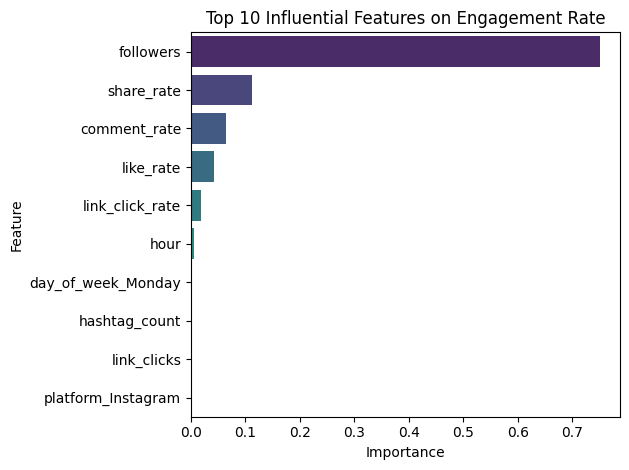

In [31]:
# Use your best tree-based model (e.g. tuned Gradient Boosting)
tree_model = best_model  # or gbr, rf, etc.

# Extract feature importances
importances = tree_model.feature_importances_

# Create DataFrame with feature names and importance
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

print("\n📊 Top 10 Important Features Influencing Engagement Rate:")
display(feature_importance_df.head(10))

# Plot top 10
top_features = feature_importance_df.head(10)

ax = sns.barplot(data=top_features, x='importance', y='feature', hue='feature', palette='viridis', dodge=False)

if ax.legend_:
    ax.legend_.remove()

plt.title('Top 10 Influential Features on Engagement Rate')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

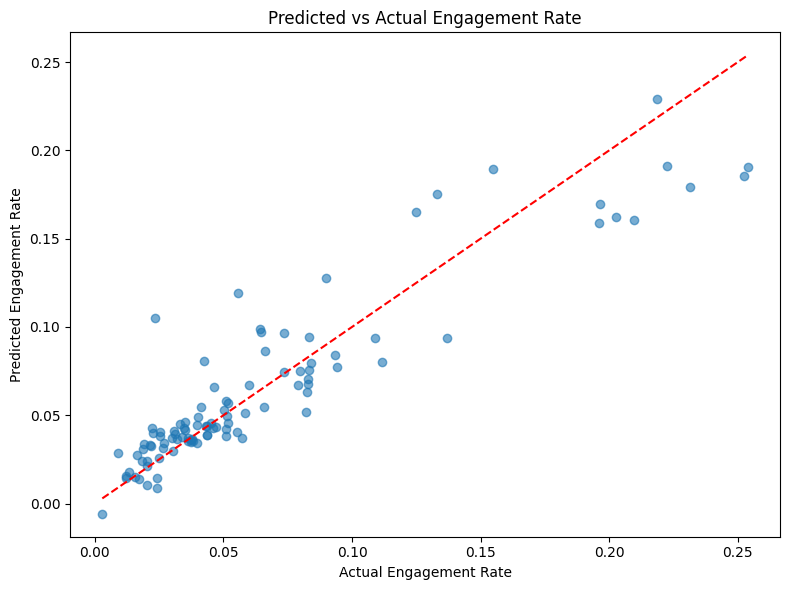

In [35]:
# Predicted vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Engagement Rate')
plt.ylabel('Predicted Engagement Rate')
plt.title('Predicted vs Actual Engagement Rate')
plt.tight_layout()
plt.show()

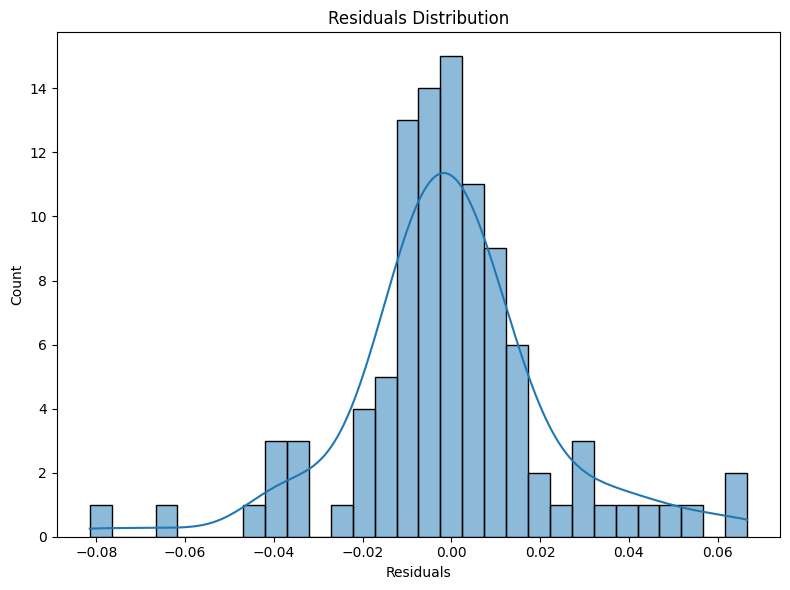

In [ ]:
# Residuals plot
residuals = y_test - y_test_pred_best

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()

In [34]:
import joblib

# Save model
joblib.dump(best_model, 'best_gradient_boosting_model.joblib')

# Later to load:
# loaded_model = joblib.load('best_gradient_boosting_model.joblib')

['best_gradient_boosting_model.joblib']